In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential, Model
from keras.layers import Flatten, UpSampling2D, Conv2DTranspose, MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.optimizers import SGD, RMSprop, Adam, Adadelta
from keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Dropout, merge, Reshape, Input
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras import backend as K
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
X_train, X_rem, y_train, y_rem = train_test_split(X_train, y_train, test_size=0.8)

In [7]:
#Scaling the data
X_train_mlp = preprocessing.StandardScaler().fit_transform(X_train.reshape(10000,32*32*3))
X_test_mlp = preprocessing.StandardScaler().fit_transform(X_test.reshape(10000,32*32*3))

In [8]:
#One-hot encoding
y_train_mlp = to_categorical(y_train, num_classes=10)
y_test_mlp = to_categorical(y_test, num_classes=10)

In [9]:
#Creating Model
mlp = Sequential()
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(10,activation='softmax'))
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy' ])

In [10]:
mlp_model = mlp.fit(X_train_mlp, y_train_mlp, batch_size=32, epochs=5, validation_data=(X_test_mlp,y_test_mlp))

Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 5s 475us/step - loss: 1.9162 - accuracy: 0.3174 - val_loss: 1.7894 - val_accuracy: 0.3632
Epoch 2/5
10000/10000 [==============================] - 3s 320us/step - loss: 1.7076 - accuracy: 0.3946 - val_loss: 1.7300 - val_accuracy: 0.3831
Epoch 3/5
10000/10000 [==============================] - 3s 313us/step - loss: 1.5987 - accuracy: 0.4343 - val_loss: 1.7019 - val_accuracy: 0.4003
Epoch 4/5
10000/10000 [==============================] - 3s 318us/step - loss: 1.5189 - accuracy: 0.4635 - val_loss: 1.6391 - val_accuracy: 0.4208
Epoch 5/5
10000/10000 [==============================] - 3s 309us/step - loss: 1.4303 - accuracy: 0.4931 - val_loss: 1.6773 - val_accuracy: 0.4110


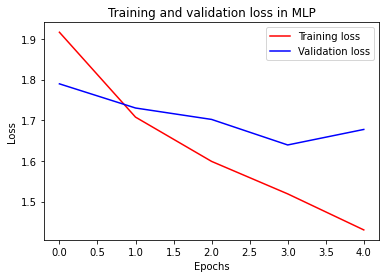

In [38]:
loss = mlp_model.history['loss']
val_loss = mlp_model.history['val_loss']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss in MLP')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

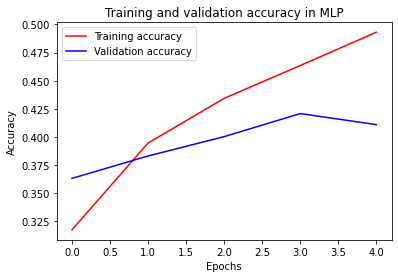

In [39]:
loss = mlp_model.history['accuracy']
val_loss = mlp_model.history['val_accuracy']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training accuracy',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy in MLP')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [13]:
#Converting images to grayscaled
X_train_cnn_grayscale = np.mean(X_train, axis=3).reshape(10000,32,32,1)
X_test_cnn_grayscale = np.mean(X_test, axis=3).reshape(10000,32,32,1)
y_train_cnn = to_categorical(y_train, num_classes=10)
y_test_cnn = to_categorical(y_test, num_classes=10)

In [14]:
#Normalizing Images
X_train_grayscale = X_train_cnn_grayscale/255
X_test_grayscale = X_test_cnn_grayscale/255

In [15]:
X_train_cnn_scaled = X_train/255
X_test_cnn_scaled = X_test/255

In [18]:
cnn_1 = Sequential()
cnn_1.add(Conv2D(64, 3, activation='relu', input_shape=(32, 32, 3)))
cnn_1.add(Conv2D(64, 3, activation='relu'))
cnn_1.add(Flatten())
cnn_1.add(Dense(512, activation='sigmoid'))
cnn_1.add(Dense(512, activation='sigmoid'))
cnn_1.add(Dense(10, activation='softmax'))
cnn_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy' ])

In [19]:
cnn_1_model = cnn_1.fit(X_train_cnn_scaled, y_train_cnn, batch_size=32, epochs=5, validation_data=(X_test_cnn_scaled, y_test_cnn))

Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 19s 2ms/step - loss: 1.7794 - accuracy: 0.3380 - val_loss: 1.5417 - val_accuracy: 0.4161
Epoch 2/5
10000/10000 [==============================] - 15s 1ms/step - loss: 1.3728 - accuracy: 0.5052 - val_loss: 1.3508 - val_accuracy: 0.5146
Epoch 3/5
10000/10000 [==============================] - 15s 1ms/step - loss: 1.0866 - accuracy: 0.6092 - val_loss: 1.3106 - val_accuracy: 0.5393
Epoch 4/5
10000/10000 [==============================] - 15s 1ms/step - loss: 0.7616 - accuracy: 0.7332 - val_loss: 1.3800 - val_accuracy: 0.5405
Epoch 5/5
10000/10000 [==============================] - 15s 1ms/step - loss: 0.3976 - accuracy: 0.8756 - val_loss: 1.5659 - val_accuracy: 0.5353


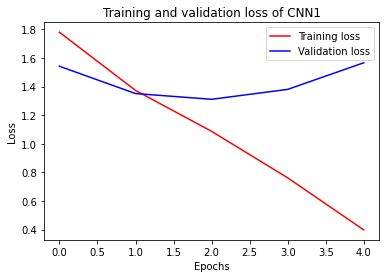

In [33]:
loss = cnn_1_model.history['loss']
val_loss = cnn_1_model.history['val_loss']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss of CNN1')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

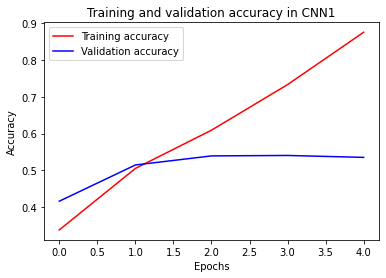

In [34]:
loss = cnn_1_model.history['accuracy']
val_loss = cnn_1_model.history['val_accuracy']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training accuracy', color = 'red')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy in CNN1')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [21]:
cnn_2 = Sequential()
cnn_2.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn_2.add(MaxPool2D((2,2)))
cnn_2.add(Conv2D(64, 3, activation='relu', padding='same'))
cnn_2.add(MaxPool2D((2,2)))
cnn_2.add(Flatten())
cnn_2.add(Dense(512, activation='sigmoid'))
cnn_2.add(Dropout(0.2))
cnn_2.add(Dense(512, activation='sigmoid'))
cnn_2.add(Dropout(0.2))
cnn_2.add(Dense(10, activation='softmax'))
cnn_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy' ])

In [22]:
cnn_2_model = cnn_2.fit(X_train_cnn_scaled, y_train_cnn, batch_size=32, epochs=5, validation_data=(X_test_cnn_scaled, y_test_cnn))

Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 6s 616us/step - loss: 1.9875 - accuracy: 0.2603 - val_loss: 1.5765 - val_accuracy: 0.4267
Epoch 2/5
10000/10000 [==============================] - 6s 553us/step - loss: 1.5305 - accuracy: 0.4423 - val_loss: 1.4503 - val_accuracy: 0.4627
Epoch 3/5
10000/10000 [==============================] - 5s 547us/step - loss: 1.3474 - accuracy: 0.5064 - val_loss: 1.3113 - val_accuracy: 0.5216
Epoch 4/5
10000/10000 [==============================] - 5s 535us/step - loss: 1.2224 - accuracy: 0.5584 - val_loss: 1.3052 - val_accuracy: 0.5224
Epoch 5/5
10000/10000 [==============================] - 5s 545us/step - loss: 1.1275 - accuracy: 0.5983 - val_loss: 1.2358 - val_accuracy: 0.5523


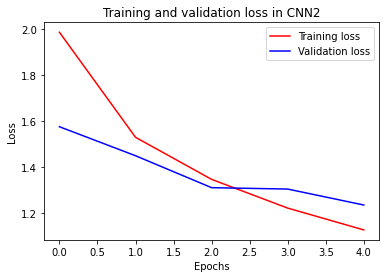

In [36]:
loss = cnn_2_model.history['loss']
val_loss = cnn_2_model.history['val_loss']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss in CNN2')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

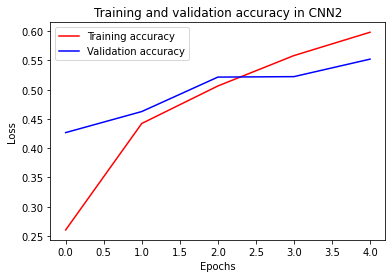

In [37]:
loss = cnn_2_model.history['accuracy']
val_loss = cnn_2_model.history['val_accuracy']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training accuracy',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy in CNN2')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()